# Comparación de K-means y DBSCAN en el Dataset Credit Card Data

En esta actividad, aplicaremos los algoritmos K-means y DBSCAN para agrupar clientes y evaluaremos los resultados utilizando métricas como el Silhouette Score y el Calinski-Harabasz Index.

In [5]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style='whitegrid')


## 1. Carga y Exploración del Dataset

In [6]:

# Cargar los datos
data = pd.read_csv('data/CCGENERAL.csv')

# Mostrar las primeras filas
print(data.head())

# Información general del dataset
print(data.info())

# Eliminar la columna 'CUST_ID' no relevante para el análisis
data.drop(columns=['CUST_ID'], inplace=True)

# Imputar valores nulos con la mediana
data.fillna(data.median(), inplace=True)

# Verificar valores nulos después de la imputación
print(data.isnull().sum())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

## 2. Preprocesamiento de Datos

In [7]:

# Estandarizar las variables numéricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convertir a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Visualizar las primeras filas de los datos estandarizados
print(scaled_df.head())


    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451      

## 3. Aplicación de K-means y Evaluación

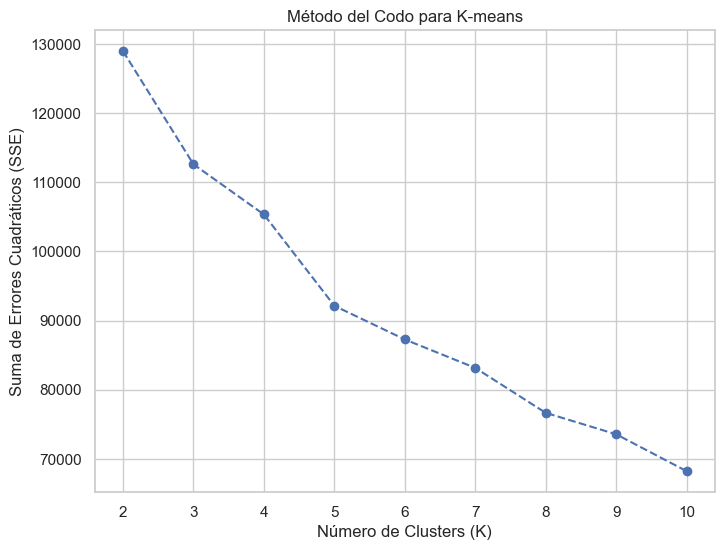

In [8]:

# Método del codo para determinar el número óptimo de clusters
sse = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.title('Método del Codo para K-means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.show()


In [9]:

# Aplicar K-means con el número óptimo de clusters (K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Evaluar K-means
silhouette_kmeans = silhouette_score(scaled_df, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(scaled_df, kmeans_labels)

print(f"Silhouette Score (K-means): {silhouette_kmeans:.4f}")
print(f"Calinski-Harabasz Index (K-means): {calinski_kmeans:.4f}")


Silhouette Score (K-means): 0.1926
Calinski-Harabasz Index (K-means): 1456.7927


## 4. Aplicación de DBSCAN y Evaluación

In [10]:

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Filtrar puntos con etiquetas válidas (excluye outliers)
valid_labels = dbscan_labels[dbscan_labels != -1]

# Evaluar DBSCAN solo si hay clusters válidos
if len(set(valid_labels)) > 1:
    silhouette_dbscan = silhouette_score(scaled_df[dbscan_labels != -1], valid_labels)
    calinski_dbscan = calinski_harabasz_score(scaled_df[dbscan_labels != -1], valid_labels)
else:
    silhouette_dbscan, calinski_dbscan = -1, -1

print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.4f}")
print(f"Calinski-Harabasz Index (DBSCAN): {calinski_dbscan:.4f}")


Silhouette Score (DBSCAN): -1.0000
Calinski-Harabasz Index (DBSCAN): -1.0000


## 5. Comparación Visual de K-means y DBSCAN

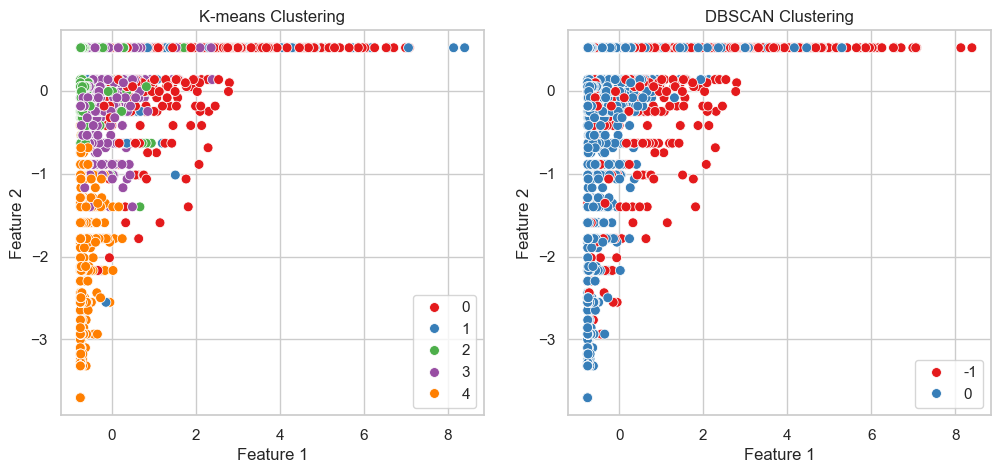

In [11]:

# Visualizar resultados de K-means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1], hue=kmeans_labels, palette='Set1', s=50)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualizar resultados de DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1], hue=dbscan_labels, palette='Set1', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## 6. Interpretación de Resultados

In [12]:

print("""Resultados de Evaluación:
- K-means:
   - Silhouette Score: {:.4f}
   - Calinski-Harabasz Index: {:.4f}
- DBSCAN:
   - Silhouette Score: {:.4f}
   - Calinski-Harabasz Index: {:.4f}
""".format(silhouette_kmeans, calinski_kmeans, silhouette_dbscan, calinski_dbscan))


Resultados de Evaluación:
- K-means:
   - Silhouette Score: 0.1926
   - Calinski-Harabasz Index: 1456.7927
- DBSCAN:
   - Silhouette Score: -1.0000
   - Calinski-Harabasz Index: -1.0000



## Conclusión

Comparando K-means y DBSCAN, podemos observar cuál de los dos algoritmos produjo clusters más cohesivos y definidos utilizando las métricas estándar de evaluación. Además, analizamos la presencia de outliers identificados por DBSCAN.